## Инициализация модели

In [3]:
import artm
from matplotlib import pyplot as plt
import datetime
import pandas as pd
%matplotlib inline

In [2]:
# batch_vectorizer = artm.BatchVectorizer(data_path="txt\\2020-03-12_2020-04-30_us_tweets_no_ngramms.txt", data_format="vowpal_wabbit", 
#                                         target_folder="2020-03-12_2020-04-30_us_tweets_no_ngramms", batch_size=100)

In [3]:
batch_vectorizer = artm.BatchVectorizer(data_path="2020-03-12_2020-04-30_us_tweets_no_ngramms", data_format='batches')

In [4]:
dictionary = artm.Dictionary(name='dictionary', data_path=batch_vectorizer.data_path)

In [99]:
T = 20  # количество тем -1
F = 1
model_artm_tweets = artm.ARTM(num_topics=T+F, topic_names=["sbj"+str(i) for i in range(T)]+["bcg"+str(i) for i in range(F)], 
                              class_ids={"text":1}, cache_theta = True, num_document_passes=1, show_progress_bars = True)
# число после названия модальностей - это их веса

In [100]:
model_artm_tweets.scores.add(artm.PerplexityScore(name='PerplexityScore', dictionary='dictionary'), overwrite=True)
model_artm_tweets.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore', class_id="text"), overwrite=True)
model_artm_tweets.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'), overwrite=True)
model_artm_tweets.scores.add(artm.TopTokensScore(name="top_words", num_tokens=15, class_id="text"), overwrite=True)
model_artm_tweets.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.5, class_id="text"))

In [104]:
%%time
model_artm_tweets.initialize(dictionary)

Wall time: 2.49 s


In [106]:
%%time
model_artm_tweets.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=40)


Wall time: 3min 46s


In [107]:
# theta = model_artm_tweets.get_theta()
# print(theta)
# theta.to_csv('20_2_2\\theta1.csv')
# phi = model_artm_tweets.get_phi()
# print(phi)
# phi.to_csv('20_2_2\\phi1.csv')

## Начальный анализ 

In [62]:
print (model_artm_tweets.score_tracker["SparsityPhiScore"].last_value)
print (model_artm_tweets.score_tracker["SparsityThetaScore"].last_value)
print (model_artm_tweets.score_tracker["PerplexityScore"].last_value)
print (model_artm_tweets.score_tracker["TopicKernelScore"].last_average_contrast)

0.8473618030548096
1.1756355888792314e-05
1703.1475830078125
0.9717655181884766


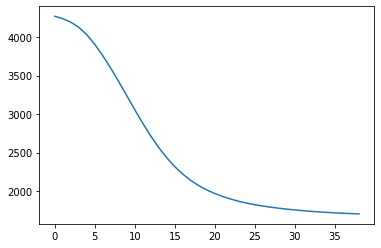

In [63]:
plt.plot(model_artm_tweets.score_tracker["PerplexityScore"].value[1:])

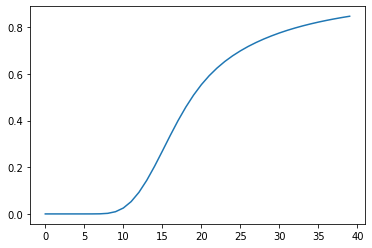

In [64]:
plt.plot(model_artm_tweets.score_tracker["SparsityPhiScore"].value)

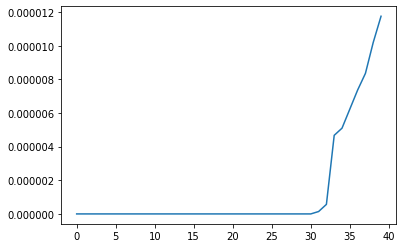

In [65]:
plt.plot(model_artm_tweets.score_tracker["SparsityThetaScore"].value)

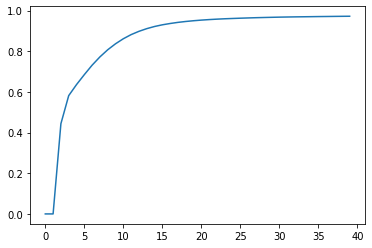

In [66]:
plt.plot(model_artm_tweets.score_tracker["TopicKernelScore"].average_contrast)

In [67]:
for topic_name in model_artm_tweets.topic_names:
    print(topic_name, model_artm_tweets.score_tracker["top_words"].last_tokens[topic_name])

sbj0 ['see', 'week', 'covid19', 'use', 'first', 'try', 'order', 'last', 'share', 'since', 'break', 'little', 'bring', 'april', 'two', 'march', 'issue', 'ago', 'child', 'safety', 'action', 'hero', 'church', 'resident', 'air', 'slow', 'ohio', 'amaze', 'past', 'return', 'three', 'currently', 'limit', 'meal', 'responder', 'contact', 'picture', 'schedule', 'figure', 'comment', 'reduce', 'illinois', 'thursday', 'relate', 'tuesday', 'large', 'inthistogether', 'necessary', 'respect', 'gathering']
sbj1 ['coronavirus', 'covid', 'stayhome', 'trump', 'stayathome', 'nyc', 'president', 'usa', 'staysafe', 'coronavirususa', 'youtube', 'stayhomesavelives', 'washyourhands', 'coronaoutbreak', 'spring', 'shelterinplace', 'lol', 'newyork', 'covidiots', 'joke', 'funny', 'stayhealthy', 'donald', 'brooklyn', 'nature', 'viral', 'savelives', 'mr', 'stopthespread', 'photography', 'forever', 'manhattan', 'comfort', '2020', 'saferathome', 'donaldtrump', 'coronavirusnewyork', 'repost', 'newyorkcity', 'besafe', 'cov

sbj18 ['us', 'come', 'family', 'world', 'support', 'friend', 'covid19', 'together', 'house', 'sure', 'hear', 'play', 'man', 'word', 'italy', 'member', 'game', 'stand', 'able', 'turn', 'vote', 'message', 'pass', 'rest', 'oh', 'group', 'different', 'consider', 'colleague', 'entire', 'appreciate', 'wife', 'clear', 'behind', 'dear', 'worst', 'ahead', 'battle', 'struggle', 'despite', 'brother', 'friends', 'fan', 'election', 'sister', 'warn', 'partner', 'humanity', 'italian', 'choice']
sbj19 ['hope', 'thanks', 'talk', 'next', 'covid19', 'around', 'happen', 'free', 'question', 'important', 'yall', 'listen', 'story', 'post', 'always', 'guy', 'medium', 'leadership', 'leader', 'lead', 'data', 'step', 'proud', 'info', 'matter', 'especially', 'expert', 'write', 'science', 'neighbor', 'nice', 'episode', 'win', 'podcast', 'sense', 'bc', 'bless', 'huge', 'interview', 'project', 'teach', 'easy', 'host', 'example', 'fill', 'remind', 'mentalhealth', 'colorado', 'activity', 'beyond']
bcg0 ['day', 'one', 

In [28]:
# phi2 = model_artm_tweets.get_phi()
# print(phi2)
# theta2 = model_artm_tweets.get_theta()
# print(theta2)

## Добавляем регуляризаторы

In [ ]:
# model_artm_tweets.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))
# model_artm_tweets.regularizers['DecorrelatorPhi'].tau = 2e+6

In [ ]:
# model_artm_tweets.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

In [ ]:
# print(model_artm_tweets.score_tracker["SparsityPhiScore"].last_value)
# print(model_artm_tweets.score_tracker["SparsityThetaScore"].last_value)
# print(model_artm_tweets.score_tracker["PerplexityScore"].last_value)

In [ ]:
# plt.plot(model_artm_tweets.score_tracker["PerplexityScore"].value[1:])

In [ ]:
# plt.plot(model_artm_tweets.score_tracker["SparsityPhiScore"].value)

In [ ]:
# plt.plot(model_artm_tweets.score_tracker["SparsityThetaScore"].value)

In [ ]:
# for topic_name in model_artm_tweets.topic_names:
#     print(topic_name, model_artm_tweets.score_tracker["top_words"].last_tokens[topic_name])

### Сглаживающий регуляризатор

In [68]:
# class_ids:class_ids=["text"] для применения регуляризатора только к некоторым модальностям
model_artm_tweets.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', class_ids={"text":1}, tau=100, 
                                topic_names = ["bcg"+str(i) for i in range(F)], dictionary=dictionary), overwrite=True)

In [69]:
model_artm_tweets.regularizers['SparsePhi'].tau = 3e+6

In [71]:
%%time
model_artm_tweets.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)


Wall time: 2min 24s


In [72]:
print (model_artm_tweets.score_tracker["SparsityPhiScore"].last_value)
print (model_artm_tweets.score_tracker["SparsityThetaScore"].last_value)
print (model_artm_tweets.score_tracker["PerplexityScore"].last_value)

0.8606791496276855
0.005910330917686224
1764.7720947265625


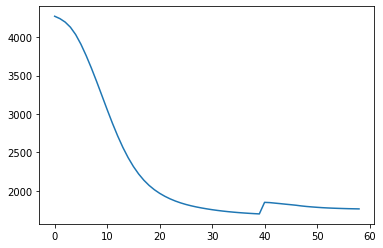

In [73]:
plt.plot(model_artm_tweets.score_tracker["PerplexityScore"].value[1:])

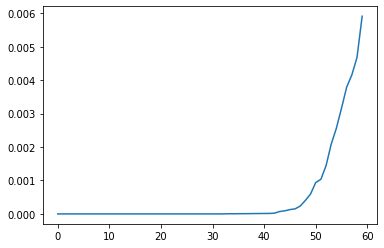

In [74]:
plt.plot(model_artm_tweets.score_tracker["SparsityThetaScore"].value)

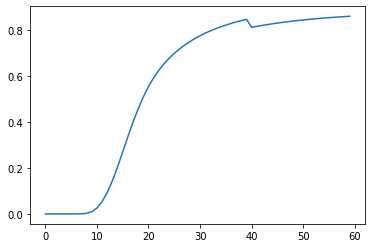

In [75]:
plt.plot(model_artm_tweets.score_tracker["SparsityPhiScore"].value)

In [76]:
#phi2 = model_artm_tweets.get_phi()
#print(phi2)
#phi2.to_csv('20_2\\phi2.csv')
#theta2 = model_artm_tweets.get_theta()
#print(theta2)
#theta2.to_csv('20_2\\theta2.csv')

In [80]:
for topic_name in model_artm_tweets.topic_names:
    print(topic_name, model_artm_tweets.score_tracker["top_words"].last_tokens[topic_name])

sbj0 ['see', 'week', 'covid19', 'use', 'first', 'order', 'try', 'last', 'share', 'since', 'two', 'break', 'little', 'april', 'bring', 'night', 'march', 'issue', 'ago', 'st', 'child', 'safety', 'action', 'hero', 'church', 'air', 'contact', 'slow', 'ohio', 'past', 'amaze', 'return', 'three', 'resident', 'currently', 'limit', 'meal', 'responder', 'couple', 'picture', 'schedule', 'comment', 'figure', 'mother', 'reduce', 'illinois', 'thursday', 'relate', 'tuesday', 'large']
sbj1 ['coronavirus', 'covid', 'stayhome', 'stayathome', 'nyc', 'president', 'usa', 'staysafe', 'coronavirususa', 'youtube', 'stayhomesavelives', 'washyourhands', 'coronaoutbreak', 'spring', 'shelterinplace', 'lol', 'newyork', 'covidiots', 'joke', 'stayhealthy', 'funny', 'donald', 'brooklyn', 'toiletpaper', 'nature', 'viral', 'savelives', 'stopthespread', 'mr', 'photography', 'forever', 'manhattan', 'comfort', 'saferathome', 'coronavirusnewyork', 'donaldtrump', 'repost', 'newyorkcity', '2020', 'besafe', 'kag', 'coronaupda

sbj18 ['us', 'come', 'family', 'covid19', 'world', 'support', 'friend', 'together', 'house', 'sure', 'hear', 'play', 'man', 'word', 'italy', 'member', 'game', 'stand', 'able', 'turn', 'vote', 'message', 'pass', 'one', 'consider', 'rest', 'oh', 'group', 'different', 'colleague', 'entire', 'appreciate', 'wife', 'clear', 'behind', 'dear', 'worst', 'ahead', 'battle', 'struggle', 'despite', 'brother', 'friends', 'election', 'fan', 'sister', 'partner', 'warn', 'italian', 'humanity']
sbj19 ['covid19', 'much', 'hope', 'thanks', 'talk', 'next', 'around', 'happen', 'free', 'question', 'important', 'yall', 'listen', 'story', 'post', 'always', 'medium', 'guy', 'leadership', 'leader', 'lead', 'data', 'step', 'proud', 'true', 'info', 'especially', 'matter', 'answer', 'expert', 'write', 'science', 'neighbor', 'nice', 'episode', 'win', 'podcast', 'sense', 'bc', 'bless', 'interview', 'huge', 'project', 'teach', 'easy', 'host', 'example', 'fill', 'rather', 'amazing']
bcg0 ['covid19', 'coronavirus', 'nt'

### Разреживающий регуляризатор

In [81]:
model_artm_tweets.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi',class_ids={"text":1}, tau=-100, 
                            topic_names = ["sbj"+str(i) for i in range(T)], dictionary=dictionary), overwrite=True)

In [82]:
#model_artm_tweets.regularizers['SparseTheta'].tau = -0.7
model_artm_tweets.regularizers['SparsePhi'].tau = -5*1e6

In [96]:
%%time
model_artm_tweets.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)


Wall time: 1min 13s


In [86]:
for topic_name in model_artm_tweets.topic_names:
    print(topic_name, model_artm_tweets.score_tracker["top_words"].last_tokens[topic_name])

sbj0 ['responder', 'govmikedewine', 'dramyacton', 'inthistogetherohio', 'oregongovbrown', 'temple', 'nyphospital', 'dental', 'dentist', 'ohdeptofhealth', 'mikedewine', 'baptist', 'interpreter', 'ry', 'sinai', 'asl', 'clevelandclinic', 'sk', 'wpro', 'moines', 'dentistry', 'unsung', 'emergencydentist', 'biologicaldentistry', 'dryani', 'yubasutter', 'emergencydentistry', 'dryani212', 'holisticdentistry', 'ruth', 'rotation', 'ltgovhusted', 'wearenorthtexas', 'holistic', 'wsyx', 'kimreynoldsia', 'orpol', 'statehouse', 'uwmedicine', 'weillcornell', 'coronaviruspandemic2020', 'melissa', 'repwelch', 'njsenatepres', 'bozeman', 'downward', 'donna', 'buddhist', 'drcarachrist', 'parishioner']
sbj1 ['stayhealthy', 'savelives', 'newyorkcity', 'coronavirusnyc', 'winning', 'tiaump', 'nyccoronavirus', 'stayhomestayhealthy', 'willfullyignorant', 'trumpsamerica', 'qanon', 'blametrump', 'wwg1wga', 'queens', 'quedateencasa', 'absofuckinglutly', 'truthbetold', 'newyorklockdown', 'usnscomfort', 'clapbecausew

sbj13 ['fauci', 'whitehouse', 'msnbc', 'trumppressconference', 'trumpliespeopledie', 'trumppressconf', 'birx', 'drfauci', 'trumppressbriefing', 'pressconference', 'pressbriefing', 'trumpownseverydeath', 'mikepence', 'trumpviruscoverup', 'trumpplague', 'trumpliesaboutcoronavirus', 'whitehousebriefing', 'yamiche', 'anthony', 'trumpdemic', 'trumpmeltdown', 'trumpisanidiot', 'trumpmadness', 'jaketapper', 'erence', 'liarinchief', 'worstpresidentinhistory', 'maga2020', 'taskforce', 'presssec', 'acosta', 'andersoncooper', 'housegop', 'gopchairwoman', 'impotus', 'podium', 'flotus', 'secpompeo', 'donlemon', 'trumplies', 'trumprecession', 'trumpcrash', '25thamendment', 'oann', 'cnnpolitics', 'ddale', 'trumpisnotadoctor', 'peteralexander', 'atrupar', 'kingtrump']
sbj14 ['lgbtq', 'veterans', 'genx', 'aarp', 'indigenous', 'millenials', '1u', 'metoo', 'latinx', 'p2', 'teaparty', 'blm', 'farmers', 'marchforourlives', 'cult', 'independents', 'voteblue', 'decency', 'cybersecurity', 'genz', 'vintage', '

In [88]:
print (model_artm_tweets.score_tracker["SparsityPhiScore"].last_value)
print (model_artm_tweets.score_tracker["SparsityThetaScore"].last_value)
print (model_artm_tweets.score_tracker["PerplexityScore"].last_value)

0.9523807764053345
0.9126815795898438
3102.661376953125


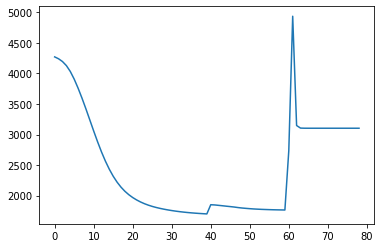

In [89]:
plt.plot(model_artm_tweets.score_tracker["PerplexityScore"].value[1:])

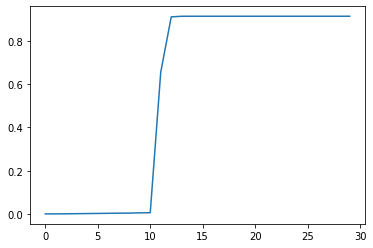

In [90]:
plt.plot(model_artm_tweets.score_tracker["SparsityThetaScore"].value[50:])

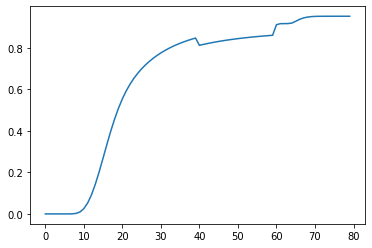

In [91]:
plt.plot(model_artm_tweets.score_tracker["SparsityPhiScore"].value)

In [93]:
model_artm_tweets.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi2', topic_names = ["sbj"+str(i) for i in range(T)],tau=6e+6))

In [94]:
model_artm_tweets.regularizers['DecorrelatorPhi2'].tau = 2e+1

In [72]:
theta3 = model_artm_tweets.get_theta()
theta3_sbj.to_csv('30.04_20_1\\theta_sbj')

In [73]:
phi3 = model_artm_tweets.get_phi()
phi3.to_csv('30.04_20_1\\phi3')

In [76]:
theta3_sbj = theta3.T.drop(["bcg"+str(i) for i in range(F)], axis='columns')

In [79]:
model_artm_tweets.dump_artm_model('30.04_20_1_model')

In [ ]:
# # for topic_name in model_artm_tweets.topic_names:
# #    print(topic_name, model_artm_tweets.score_tracker["top_words"].last_tokens[topic_name])

# #a=[];b=[]    
# #for k in np.arange(0,len(c),1):#сортировка слов по убыванию частоты в i -м документе 
# #        ind=c.index(max(c));  a.append(c[ind])
# #        b.append(d[ind]); del c[ind]; del d[ind]
# #    x.append(i)#список номеров документов
# #    y.append(len(a))#список количества слов в документах     
# #    a=a[0:10];b=b[0:10]# TOP-10 для частот a  и слов b в i -м документе
# #plt.xlabel(u'Номера документов', size=12)
# #plt.ylabel(u'Количество слов', size=12)
# #plt.bar(x,y, 1)
# #plt.grid(True)
# #plt.show()
# top_tokens = model_artm_tweets.score_tracker["top_words"]
# topic_names = model_artm_tweets.topic_names[: - 1]
# for topic_name in topic_names:
#     for (token, weight) in zip(top_tokens.last_tokens[topic_name],
#                                top_tokens.last_weights[topic_name]):
#         print (token, '-', weight)
#     print('/n')

In [ ]:
# for topic_name in topic_names:
#     x=[]
#     y=[]
#     for (token, weight) in zip(top_tokens.last_tokens[topic_name],
#                                top_tokens.last_weights[topic_name]):
#         x.append(token)#список номеров документов
#         y.append(weight)#список количества слов в документах     
#     plt.xlabel(u'Terms', size=12)
#     plt.ylabel(u'Weight', size=12)
#     plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
#     plt.bar(x, y, 1,)
#     plt.grid(True)
#     plt.savefig('output/plt' + topic_name + '.png', bbox_inches='tight',dpi=100)
#     plt.show()

In [ ]:
# f = open('topics.txt', 'a', encoding='utf-8')
# top_tokens = model_artm_tweets.score_tracker["top_words"]
# topic_names = model_artm_tweets.topic_names[: - 1]
# for topic_name in topic_names:
#     for (token, weight) in zip(top_tokens.last_tokens[topic_name],
#                                top_tokens.last_weights[topic_name]):
#         f.write(token + ' ' + topic_name[3:],)
#         f.write('\n')
#     #f.write('\n')
# f.close()

In [ ]:
# file_name = r"2020-03-12_2020-04-30_tweets\\2020-03-12_2020-04-30_us_tweets.csv"
# us_tweets = pd.read_csv(file_name, sep=",", encoding='utf-8')
# us_tweets_with_topics = us_tweets.join(theta3)
# us_tweets_with_topics.to_csv(r'2020-03-12_2020-04-30_tweets\\2020-03-12_2020-04-30_us_tweets_with_topics.csv', index=False)